<a href="https://colab.research.google.com/github/lphuong304/CS114.L21/blob/main/L%E1%BA%ADp%20tr%C3%ACnh%20Python/assignments%204%20.1/snake_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Người đóng góp: Nguyễn Ngọc Lan Phương*
 ## ĐỀ BÀI

 Game con rắn (snake game) là một trò chơi rất phổ biến kể từ thời điện tử băng. Một phiên bản game con rắn đơn giản được chơi trên một bảng hình chữ nhật, con rắn là một dãy các ô liên tiếp. Rắn luôn di chuyển về phía trước, có thể quẹo trái hoặc quẹo phải. Rắn sẽ bị chết nếu nó đụng vào chính phần thân của mình hoặc đi ra ngoài bảng.

 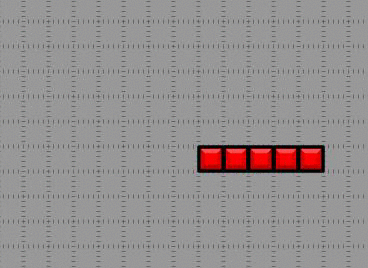

 Một trong những đặc điểm khiến game con rắn trở nên rất phổ biến là vì trò này cực kỳ dễ code. Màn hình game có thể dễ dàng được thể hiện bằng một mảng hai chiều, mỗi phần tử trong mảng là một ký tự. Những ô trống có thể được thể hiện bằng dấu chấm ("."), thân rắn có thể được thể hiện bằng dấu sao "*" và đầu rắn, vốn cho biết rắn sẽ di chuyển về hướng nào, có thể được thể hiện bằng một trong 4 ký tự  < , ^ , > , v tương ứng với 4 hướng trái trên phải dưới.

Ở phiên bản hardcore nhất của trò chơi con rắn người chơi xác định hướng đi của rắn chỉ thông qua 03 lệnh cơ bản: Để rắp tiếp tục đi tới, cho rắn quay đầu sang phải, cho rắn qua đầu sang trái (chú ý là khi quay đầu rắn không di chuyển), ta có thể lưu trữ lại các lệnh này bằng một mảng ký tự trong đó ký tự F nghĩa là cho rắn đi tới 1 ô, ký tự R nghĩ là cho rắn quay đầu sang phải, ký tự L nghĩa là cho rắn quay đầu sang trái.

Cho một màn hình game và chuỗi lệnh của người dùng. Bạn hãy xác định trạng thái màn hình sau khi rắn thực hiện hết các lệnh trên.

## INPUT
Dòng đầu tiên chứ 02 số n, m và c, đây là kích thước của bảng

n dòng tiếp theo, mỗi dòng chứa m ký tự như mô tả ở trên.

Dòng cuối cùng của input chứa c ký tự. Đây là chuỗi các lệnh của người dùng vào.

## OUTPUT
Trạng thái của màn hình game khi rắn thực hiện hết chuỗi lệnh. Nếu rắn đã chết thì vẻ các mà xác rắn đang nằm là ký tự X.


* *Ý tưởng*: Sử dụng tọa độ để đánh dấu cho vị trí đầu rắn và thân rắn. Cứ mỗi lần xuất hiện một thao tác **R**,**L** hoặc **F** xác định hiện trạng đầu rắn lúc đó và thay đổi theo trạng thái tương ứng, thực hiện thao tác đi tới **F** bằng cách dịch tọa độ đầu rắn và thay tọa độ đuôi rắn cũ thành tọa đồ đầu cũ.

In [2]:
n,m,c=map(int,input().split())
global map_snake,body_snake,head_snake,full_snake,check_head
map_snake=[]
for i in range(n):   
   map_snake.append([x for x in input().strip()])
move_list=input()

def find_coor_snake(map_snake,n,m):
    head_chars=['<', '>', '^', 'v']
    head_snake=[-1,-1]
    body_snake=[]
    for i in range(n):
        for j in range(m):
            if map_snake[i][j] in head_chars:
                head_snake=[i,j]
            if map_snake[i][j] == '*':
                body_snake.append([i,j])
    return body_snake,head_snake

def get_near_points(body_snake,point):
    left = [point[0], point[1] - 1]
    top = [point[0] - 1, point[1]]
    right = [point[0], point [1] + 1]
    bottom = [point[0] + 1, point[1]]
    if left in body_snake:
        return left
    if top in body_snake:
        return top
    if right in body_snake:
        return right
    if bottom in body_snake:
        return bottom

#hàm sắp xếp thân rắn
def get_order_body(head_snake, body_snake):
    result = [head_snake]
    flag = head_snake
    while len(body_snake) > 0:
        flag = get_near_points(body_snake, flag)
        result.append(flag)
        del body_snake[body_snake.index(flag)]
    return result

def find_head_snake(map_snake,n,m,full_snake):
    if map_snake[full_snake[0][0]][full_snake[0][1]] == '<': #ran dang quay trai
        return 0
    if map_snake[full_snake[0][0]][full_snake[0][1]] == '>': #ran dang quay phai
        return 1
    if map_snake[full_snake[0][0]][full_snake[0][1]] == '^': #ran dang huong len
        return 2
    if map_snake[full_snake[0][0]][full_snake[0][1]] == 'v': #ran dang hương xuong
        return 3

def move_snake(map_snake,check_head,full_snake):

    if check_head == 0:
        old_head = full_snake[0]
        new_head = [old_head[0], old_head[1] - 1]
        if new_head == full_snake[len(full_snake) - 1]:
            oldLast = full_snake.pop(0)
            full_snake.append(oldLast)
            new_head = full_snake[0]
            new_last = full_snake[len(full_snake) - 1]
            map_snake[new_head[0]][new_head[1]] = '<'
            map_snake[new_last[0]][new_last[1]] = '*'
            return full_snake
        else:
            die_snake(map_snake,full_snake,old_head,new_head)
        map_snake[new_head[0]][new_head[1]] = '<'
        
        map_snake[old_head[0]][old_head[1]] = '*'
        
        full_snake.insert(0, new_head)
        tail_snake = full_snake.pop()
        
        map_snake[tail_snake[0]][tail_snake[1]] = '.'
        #die_snake(map_snake,full_snake)
    

    if check_head == 1:
        old_head = full_snake[0]
        new_head = [old_head[0], old_head[1] + 1]
        if new_head == full_snake[len(full_snake) - 1]:
            oldLast = full_snake.pop(0)
            full_snake.append(oldLast)
            new_head = full_snake[0]
            new_last = full_snake[len(full_snake) - 1]
            map_snake[new_head[0]][new_head[1]] = '>'
            map_snake[new_last[0]][new_last[1]] = '*'
            return full_snake
        else:
            die_snake(map_snake,full_snake,old_head,new_head)
        map_snake[new_head[0]][new_head[1]] = '>'
        
        map_snake[old_head[0]][old_head[1]] = '*'
        
        full_snake.insert(0, new_head)
        tail_snake = full_snake.pop()
        
        map_snake[tail_snake[0]][tail_snake[1]] = '.'
        #die_snake(map_snake,full_snake)

    if check_head == 2:
        old_head = full_snake[0]
        new_head = [old_head[0] - 1, old_head[1]]
        if new_head == full_snake[len(full_snake) - 1]:
            oldLast = full_snake.pop(0)
            full_snake.append(oldLast)
            new_head = full_snake[0]
            new_last = full_snake[len(full_snake) - 1]
            map_snake[new_head[0]][new_head[1]] = '^'
            map_snake[new_last[0]][new_last[1]] = '*'
            return full_snake
        else:
            die_snake(map_snake,full_snake,old_head,new_head)
        map_snake[new_head[0]][new_head[1]] = '^'
        
        map_snake[old_head[0]][old_head[1]] = '*'
        
        full_snake.insert(0, new_head)
        tail_snake = full_snake.pop()
        
        map_snake[tail_snake[0]][tail_snake[1]] = '.'
        #die_snake(map_snake,full_snake)

    if check_head == 3:
        old_head = full_snake[0]
        new_head = [old_head[0] + 1, old_head[1]]
        if new_head == full_snake[len(full_snake) - 1]:
            oldLast = full_snake.pop(0)
            full_snake.append(oldLast)
            new_head = full_snake[0]
            new_last = full_snake[len(full_snake) - 1]
            map_snake[new_head[0]][new_head[1]] = 'v'
            map_snake[new_last[0]][new_last[1]] = '*'
            return full_snake
        else:
            die_snake(map_snake,full_snake,old_head,new_head)
        map_snake[new_head[0]][new_head[1]] = 'v'
        
        map_snake[old_head[0]][old_head[1]] = '*'
        
        full_snake.insert(0, new_head)
        tail_snake = full_snake.pop()
        
        map_snake[tail_snake[0]][tail_snake[1]] = '.'

    return full_snake

def die_snake(map_snake, full_snake,old_head,new_head):
    
    if (new_head in full_snake) or (new_head[0] < 0) or (new_head[1] < 0) or (new_head[0] > len(map_snake) - 1) or (new_head[1] > len(map_snake[0]) - 1):
        
        for i in range(len(full_snake)):
            map_snake[full_snake[i][0]][full_snake[i][1]] = 'X'
        
        for i in map_snake:
            print(*i,sep='')

        exit()
    else:
        return

def turn_snake_head(map_snake, n, m, i, full_snake):
    check_head=find_head_snake(map_snake,n,m,full_snake)
    if i == 'R':
        if check_head == 0:
            #check_head = 2
            map_snake[full_snake[0][0]][full_snake[0][1]] = '^'

        elif check_head == 1:
            #check_head = 3
            map_snake[full_snake[0][0]][full_snake[0][1]] = 'v'

        elif check_head == 2:
            #check_head = 1
            map_snake[full_snake[0][0]][full_snake[0][1]] = '>'

        elif check_head == 3:
            #check_head = 0
            map_snake[full_snake[0][0]][full_snake[0][1]] = '<'

    elif i == 'L':
        if check_head == 0:
            #check_head = 3
            map_snake[full_snake[0][0]][full_snake[0][1]] = 'v'

        elif check_head == 1:
            #check_head = 2
            map_snake[full_snake[0][0]][full_snake[0][1]] = '^'

        elif check_head == 2:
            #check_head = 0
            map_snake[full_snake[0][0]][full_snake[0][1]] = '<'

        elif check_head == 3:
            #check_head = 1
            map_snake[full_snake[0][0]][full_snake[0][1]] = '>'

    elif i == 'F':
        full_snake = move_snake(map_snake,check_head,full_snake)

body_snake, head_snake = find_coor_snake(map_snake,n,m)
full_snake = get_order_body(head_snake,body_snake)

for i in move_list:
    turn_snake_head(map_snake,n,m,i,full_snake)

print("Output:\n")
for i in map_snake:
    print(*i,sep='')

6 6 4
......
....^.
....*.
...**.
..**..
..*...
LFFLFLF
Output:

......
..***.
..*>*.
....*.
......
......
